In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd '/content/gdrive/My Drive/Colab Notebooks/DSC DL Class/'

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/DSC DL Class


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Step 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import datasets

In [ ]:
# Step 3
mnist = datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)
# Image shape = batch, height, width, channel
# channel = 1 for greyscale image data and fo RGB = 3?

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


(None, ((10000, 28, 28), (10000,)))

# Reshape data from 2D to 1D

In [ ]:
# Step 4
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
# Step 5
# Scale Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Explore Data

In [ ]:
# Step 6
print('No. of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

No. of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


Data Visualization

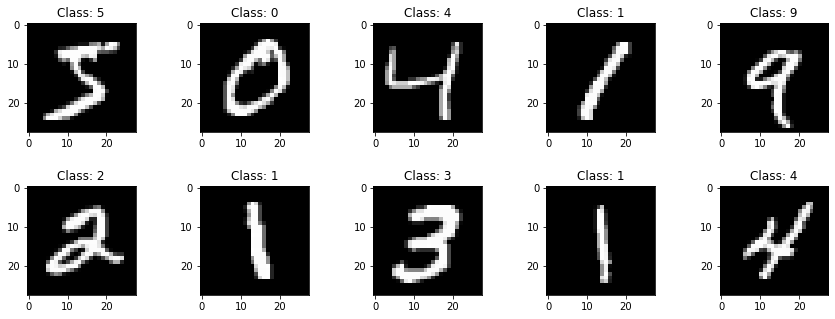

In [ ]:
# Step 7
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
ax = axes.ravel()
for i in range(10):
  ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
  ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

View image in more detail

In [ ]:
# Step 8
img = np.squeeze(X_train[7].reshape(28,28))
img.shape

(28, 28)

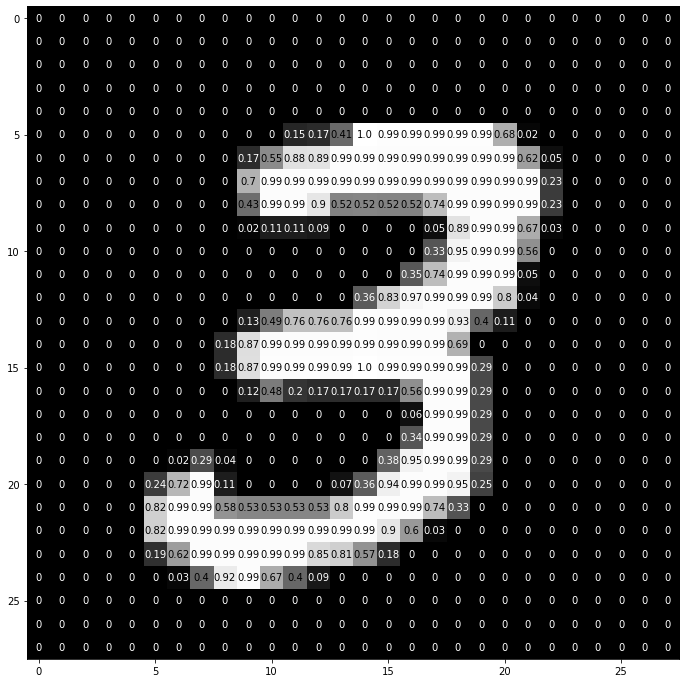

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                color = 'white' if img[x][y]<thresh else 'black')

# Model Architecture

In [ ]:
# Step 9
model = Sequential()

model.add(Dense(400, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])
# this loss because output is classes not in one-hot-encoded

In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               102656    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 458,458
Trainable params: 458,458
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience=25)

In [ ]:
# Step 10
model.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2156 - accuracy: 0.9343 - val_loss: 0.1039 - val_accuracy: 0.9681
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0957 - accuracy: 0.9714 - val_loss: 0.1025 - val_accuracy: 0.9678
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0866 - val_accuracy: 0.9745
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0786 - val_accuracy: 0.9783
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.0867 - val_accuracy: 0.9760
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0711 - val_accuracy: 0.9799
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0960 - val_ac

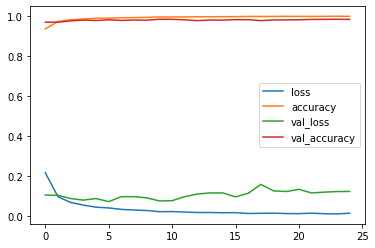

In [ ]:
# Step 11
losses = pd.DataFrame(model.history.history)
losses.plot()

# Prediction and Evaluation

In [ ]:
# Step 12
predictions = model.predict_classes(X_test)
f1 = f1_score(y_test, predictions, average ="micro")

pred = model.predict_proba(X_test)
roc = roc_auc_score(y_test, pred, multi_class = "ovo")

acc = accuracy_score(y_test, predictions)
err = 1 - acc

stats = pd.DataFrame({"Test accuracy" : round(acc*100, 3),
                      "F1 Score": round(f1*100, 3),
                      "ROC AUC score": round(roc*100,3),
                      "Test loss": round(err*100,3)},
                      index= [0])
stats.head()

# Testing model on new image
- from our test set

In [ ]:
# Step 13
sample_one = np.expand_dims(X_test[999], axis=[0])

model.predoct_classes(sample_one)

In [ ]:
plt.imshow(X_test[105].reshape(28,28))